## <font color = blue> TRANSFORMED VARIABLES

If $x$ and $ln(y)$ follows linear relationship, the correponding linear is
$$ ln(y) = \beta_0 + \beta_1 x $$ 

To fit this model, we transform $y$ to $ln(y)$ and fit the linear model to the data points $(x,ln(y)$

---------

If $ln(x)$ and $ln(y)$ follows linear relationship, the correponding linear is
$$ ln(y) = \beta_0 + \beta_1 ln(x) $$ 

To fit this model, we transform $x$ to $ln(x)$ and $y$ to $ln(y)$ and fit the linear model to the data points $(ln(x),ln(y)$

## EXAMPLE 1

This example illustrates the use of regression analysis to verify whether a sample conforms to a theoretical equation and to determine the coefficients of the model.

#### Transform the variables and estimate the parameteres $\alpha$  and $\beta$

Taylor’s equation for tool life y as a function of cutting time x states that $xy^c  =  k$
or, equivalently, that $y = \alpha x^{\beta}$. The article “The Effect of Experimental Error on
the Determination of Optimum Metal Cutting Conditions” (J. of Engr. for Industry,
1967: 315–322) observes that the relationship is not exact (deterministic) and that
the parameters $\alpha$ and $\beta$ must be estimated from data.

Thus an appropriate model
is the multiplicative power model $ Y = \alpha x^{\beta} \epsilon$ , which the author fit to the accompanying data consisting of 12 carbide tool life observations in belowe table. 

$$
\begin{array}{|c|c|c|c|c|c|c|c|c|c|c|c|}
\hline
x & 600 & 600 & 600 & 600 & 500 & 500 & 500 & 500 & 400 & 400 & 400 & 400   \\
\hline
y & 2.35 & 2.65 & 3.00 & 3.60 & 6.40 & 7.80 & 9.80 & 16.50 & 21.50 & 24.50 & 26.00 & 33.00 \\
\hline
\end{array}
$$

#### Main aim is to find the parameters $\alpha$ $\beta$

Since $$Y = \alpha x^{\beta} \epsilon $$ 
    $$ ln(Y) = ln(\alpha) + \beta ln(x) + ln(\epsilon)$$ which is linear

- Transform the variable x into ln(x)
- Transform the variable y into ln(y)
- Fit a linear regression model into ln(x) and ln(y)
- Find parameters $ln(\alpha)$ and $\beta$ and thus $\alpha$ and $\beta$

- Find errors and standardized error
- Plot standardized eror vs x 
- Plot predicted y and y

- Calculate $R^2$ value for the fit

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# DataFrame

data = {
    'x': [600, 600, 600, 600, 500, 500, 500, 500, 400, 400, 400, 400],
    'y': [2.35, 2.65, 3.00, 3.60, 6.40, 7.80, 9.80, 16.50, 21.50, 24.50, 26.00, 33.00]
}


df = pd.DataFrame(data)

df.head()

,x,y
0,600,2.35
1,600,2.65
2,600,3.00
3,600,3.60
4,500,6.40


In [3]:
df.shape

(12, 2)

### Scatter Plot of x and y

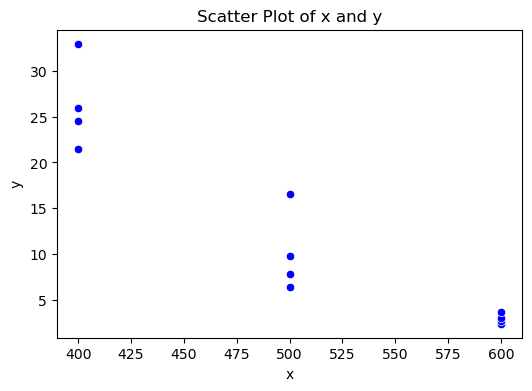

In [4]:
plt.figure(figsize=(6,4))

sns.scatterplot(data=df, x='x', y='y', color='blue')

plt.title('Scatter Plot of x and y')

plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [5]:
# Transform the column to ln
df['ln(x)'] = df['x'].apply(np.log)
df['ln(y)'] = df['y'].apply(np.log)

df.head()

,x,y,ln(x),ln(y)
0,600,2.35,6.396930,0.854415
1,600,2.65,6.396930,0.974560
2,600,3.00,6.396930,1.098612
3,600,3.60,6.396930,1.280934
4,500,6.40,6.214608,1.856298


### Scatter plot of ln(x) and ln(y)

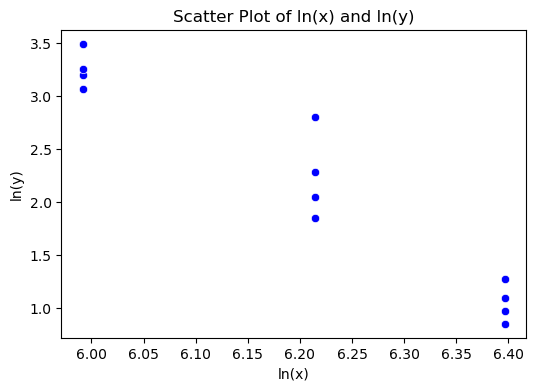

In [6]:
plt.figure(figsize=(6,4))

sns.scatterplot(data=df, x='ln(x)', y='ln(y)', color='blue')

plt.title('Scatter Plot of ln(x) and ln(y)')

plt.xlabel('ln(x)')
plt.ylabel('ln(y)')

plt.show()

### Fit a linear regression model on to ln(x) and ln(y)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
ln_x = df['ln(x)'].values
ln_y = df['ln(y)'].values

In [9]:
ln_x = ln_x.reshape(-1,1)
ln_y = ln_y.reshape(-1,1)

In [10]:
regressor = LinearRegression(fit_intercept=True)
regressor.fit(ln_x,ln_y)

LinearRegression()

### Parameters

Since $ ln(Y) = ln(\alpha) + \beta ln(x) + ln(\epsilon)$ slope of the model is $\beta$ and $y$ intercept is $ln(\alpha)$

In [11]:
slope = regressor.coef_[0]  # Slope of the regression line
intercept = regressor.intercept_  # Intercept of the regression line

In [12]:
print(" Estimate of the slope is ", slope)

 Estimate of the slope is  [-5.39974349]


So estimated $\beta  = -5.39974349 $

In [13]:
print(" Estimate of the intercept is", intercept)

 Estimate of the intercept is [35.66931485]


So estimate of $ln(\alpha) = 35.66931485$

In [14]:
# The alpha value
import math

alpha = math.exp(35.66931485)

print('Estimated alpha is', alpha)

print(f"{alpha:.3e}")

Estimated alpha is 3097323820970384.5
3.097e+15


So estimated $\alpha = 3.097*10^{15}$  

### So estimated equation

So Taylor's estimated equation is $ Y = 3.097.10^{15}.x^{-5.39974349} $

### Predicted y and errors

In [15]:
predicted_ln_y = regressor.predict(ln_x)  #ln_x because fit is on ln_x,ln_y

df['predicted_ln_y'] = predicted_ln_y    #Since fit is on ln of y the prdicted value is ln of required prediction

df['predicted_y'] = np.exp(df['predicted_ln_y']) # Predicted y is inverse of ln

df['error'] = df['y'] - df['predicted_y']

In [16]:
df.head(10)

,x,y,ln(x),ln(y),predicted_ln_y,predicted_y,error
0,600,2.35,6.396930,0.854415,1.127536,3.088037,-0.738037
1,600,2.65,6.396930,0.974560,1.127536,3.088037,-0.438037
2,600,3.00,6.396930,1.098612,1.127536,3.088037,-0.088037
3,600,3.60,6.396930,1.280934,1.127536,3.088037,0.511963
4,500,6.40,6.214608,1.856298,2.112025,8.264963,-1.864963
5,500,7.80,6.214608,2.054124,2.112025,8.264963,-0.464963
6,500,9.80,6.214608,2.282382,2.112025,8.264963,1.535037
7,500,16.50,6.214608,2.803360,2.112025,8.264963,8.235037
8,400,21.50,5.991465,3.068053,3.316943,27.575926,-6.075926
9,400,24.50,5.991465,3.198673,3.316943,27.575926,-3.075926


# Standardized error 
$e_i^* = \frac{y_i - \hat{y}_i}{s\sqrt{1 - \frac{1}{n} - \frac{(x_i - \bar{x})^2}{s_{xx}}}} \quad i = 1, ..., n$


Where $s = standard \ error $

And $ s_{xy} = \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})$

So $ s_{xx} = \sum_{i=1}^{n} (x_i - \bar{x})^2$

In [17]:
# Standard deviation of error 
s = df['error'].std()

# Number of raws 
n = 12 

# mean of x (x bar)
mean_x = df['x'].mean()

#s_xx
s_xx = ((df['x'] - mean_x)**2).sum()

df['x-xbar_whole square'] = (df['x'] - mean_x)**2

df['standardized_error'] = df['error']/(s*(np.sqrt(1 - (1/n) - ((df['x-xbar_whole square'])/s_xx))))

In [18]:
df['standardized_error']

0    -0.222415
1    -0.132007
2    -0.026531
3     0.154285
4    -0.522302
5    -0.130217
6     0.429903
7     2.306306
8    -1.831042
9    -0.926962
10   -0.474921
11    1.634600
Name: standardized_error, dtype: float64

### Scatter plots of standardized error vs x

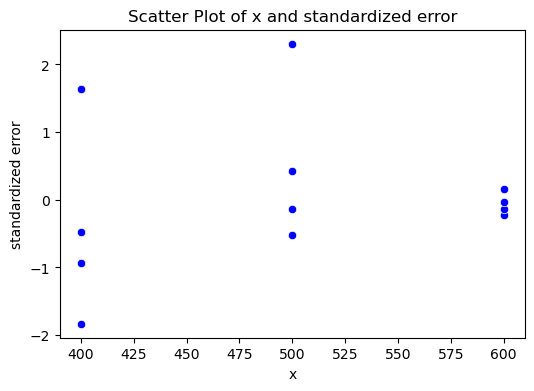

In [19]:
plt.figure(figsize=(6,4))

sns.scatterplot(data=df, x='x', y='standardized_error', color='blue')

plt.title('Scatter Plot of x and standardized error')

plt.xlabel('x')
plt.ylabel('standardized error')

plt.show()

<font color = green> There is no apparent pattern
in the plot, though one standardized residual is a bit large, and the residuals look as
they should for a simple linear regression

### Scatter Plot of Y vs Predicted Y

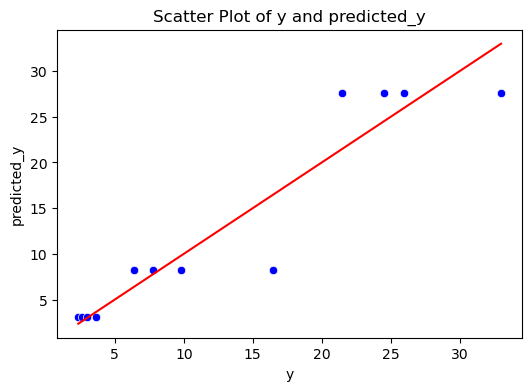

In [20]:
plt.figure(figsize=(6,4))

sns.scatterplot(data=df, x='y', y='predicted_y', color='blue')

plt.title('Scatter Plot of y and predicted_y')



# To Draw 45 degree line for comparison

## Max and min range of y value
max_limit = max(df['y'].max(), df['predicted_y'].max())  
min_limit = min(df['y'].min(), df['predicted_y'].min())  

# Create x values for the 45-degree line
x_values = np.linspace(min_limit, max_limit, 100)

# Plotting the 45-degree line
plt.plot(x_values, x_values, label='45 degree line', color='red')  


# Label x and y axis
plt.xlabel('y')
plt.ylabel('predicted_y')

plt.show()

### Calculate $R^2$ value for the fit

In [21]:
r_squared = regressor.score(ln_x, ln_y)
r_squared

0.9223597968340076

<font color = green> Plot of $ \hat y$ versus y, also $R^2 = 0.922$ indicates satisfactory predictions on the original scale

----------------
--------------

## EXAMPLE 2

This example demonstrates how we can model the equation by analyzing the relationship between the data and determining the coefficients.

In the article “Ethylene Synthesis in Lettuce Seeds: Its Physiological
Significance” (Plant Physiology, 1972: 719–722), ethylene content of lettuce
seeds (y, in nL/g dry wt) was studied as a function of exposure time (x, in min) to an ethylene absorbent. The author did not give any argument for a theoretical model

$$
\begin{array}{|c|c|c|c|c|c|c|c|c|c|c|}
\hline
x & 2 & 10 & 20 & 30 & 40 & 50 & 60  & 70 & 80 & 90 & 100   \\
\hline
y & 408 & 272 & 196 & 137 & 90 & 78 & 51 & 40 & 30 & 22 & 15\\
\hline
\end{array}
$$

- Fit the linear regression model to x and y and evaluate the model.
- If it is not a good model find a better one 

In [22]:
# create data frame

data = {
    'x': [2, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'y': [408, 272, 196, 137, 90, 78, 51, 40, 30, 22, 15]
       }

df = pd.DataFrame(data)

### Scatter Plot of x and y

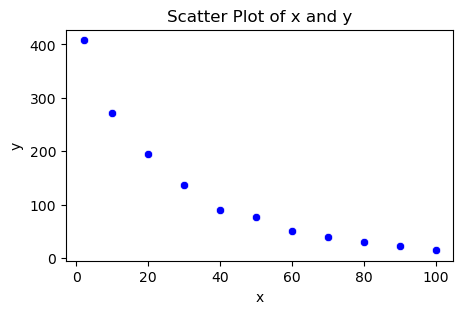

In [23]:
plt.figure(figsize=(5,3))

sns.scatterplot(data=df, x='x', y='y', color='blue')

plt.title('Scatter Plot of x and y')

plt.xlabel('x')
plt.ylabel('y')

plt.show()

### Fit Linear Regression Model to x and y

In [24]:
x = df['x'].values
y = df['y'].values

x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [25]:
regressor = LinearRegression() #Already imported LinearRegression from sklearn
regressor.fit(x,y)

LinearRegression()

In [26]:
# predict y values
y_pred = regressor.predict(x)

In [27]:
slope = regressor.coef_[0]  # Slope of the regression line
intercept = regressor.intercept_  # Intercept of the regression line

print(slope)
print(intercept)

[-3.36807472]
[290.74338607]


### Regression Line of x and y

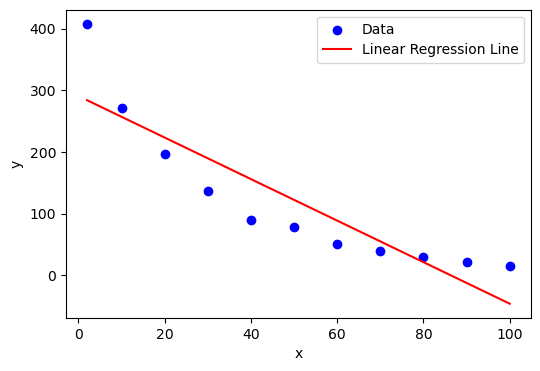

In [28]:
plt.figure(figsize=(6,4))
plt.scatter(x,y, color = "Blue", label = 'Data')
plt.plot(x,y_pred, color ='Red' , label = "Linear Regression Line")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Scatter plot for y vs predicted y and 45 degree line

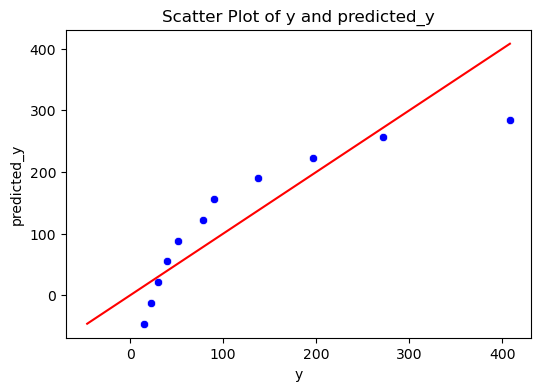

In [29]:
# Update predictions into dataframe
df['predicted_y'] = y_pred



plt.figure(figsize=(6,4))

sns.scatterplot(data=df, x='y', y='predicted_y', color='blue')

plt.title('Scatter Plot of y and predicted_y')



# To Draw 45 degree line for comparison

## Max and min range of y value
max_limit = max(df['y'].max(), df['predicted_y'].max())  
min_limit = min(df['y'].min(), df['predicted_y'].min())  

# Create x values for the 45-degree line
x_values = np.linspace(min_limit, max_limit, 100)

# Plotting the 45-degree line
plt.plot(x_values, x_values, label='45 degree line', color='red')  


# Label x and y axis
plt.xlabel('y')
plt.ylabel('predicted_y')

plt.show()

### Calculate $R^2$ value

In [30]:
r_squared = regressor.score(x, y)
r_squared

0.7925522314856496

## Calculate error and standardized error

In [31]:
df['error'] = df['y'] - df['predicted_y']

# Standardize error using standard scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Standard error'] = scaler.fit_transform(df[['error']])

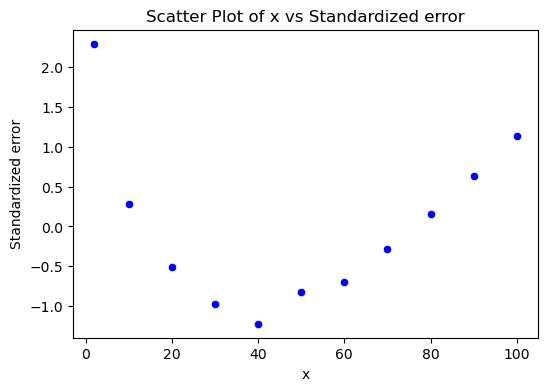

In [32]:
### Plot Standardized error vs x

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='x', y='Standard error', color='blue')

plt.title('Scatter Plot of x vs Standardized error')

plt.xlabel('x')
plt.ylabel('Standardized error')

plt.show()

There is a pattern in the standardized error

<font color = green> Both scatter plot of the data and a plot of the residuals generated from a linear regression of y on x, show a strong curved pattern, suggesting that a transformation to achieve linearity is appropriate.
    
<font color = green> Also the $R^2 = 0.79$ so predictive capacity of this model is low

### Let transform the variables

In [33]:
# Update dataframe
data = {
    'x': [2, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'y': [408, 272, 196, 137, 90, 78, 51, 40, 30, 22, 15]
       }

df = pd.DataFrame(data)

In [34]:
df['ln_x'] = np.log(df['x'])
df['ln_y'] = np.log(df['y'])

In [35]:
df

,x,y,ln_x,ln_y
0,2,408,0.693147,6.011267
1,10,272,2.302585,5.605802
2,20,196,2.995732,5.278115
3,30,137,3.401197,4.919981
4,40,90,3.688879,4.499810
5,50,78,3.912023,4.356709
6,60,51,4.094345,3.931826
7,70,40,4.248495,3.688879
8,80,30,4.382027,3.401197
9,90,22,4.499810,3.091042


### Scatter plots of the transformed variables

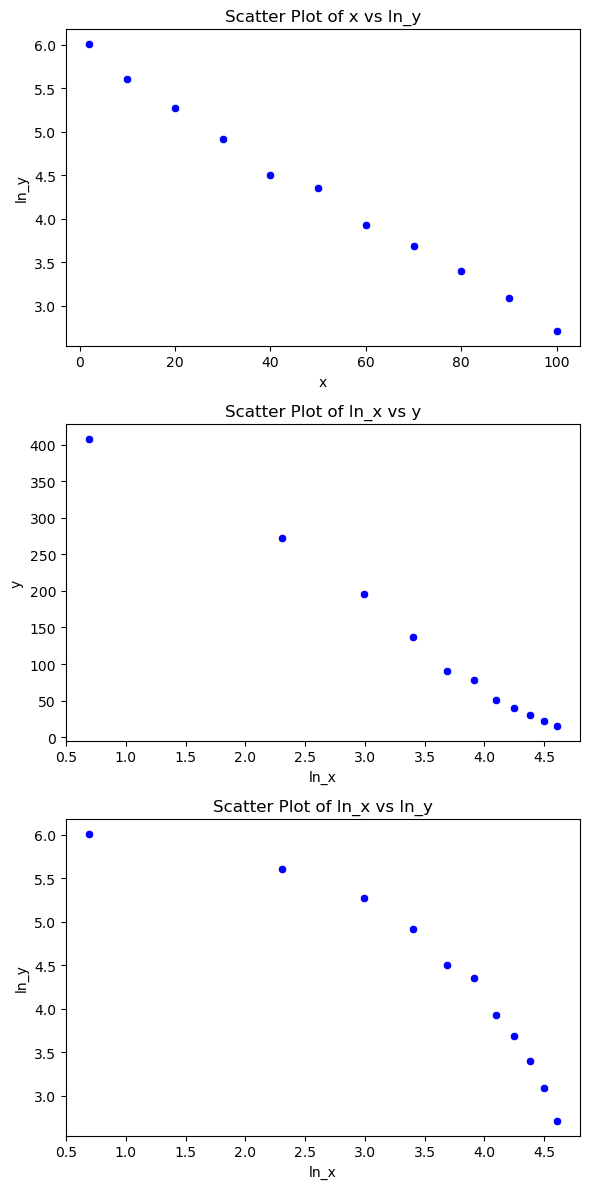

In [36]:
# Create a figure with three subplots arranged vertically
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 12))

# First plot: 'x' vs 'ln_y'
sns.scatterplot(data=df, x='x', y='ln_y', color='blue', ax=axes[0])
axes[0].set_title('Scatter Plot of x vs ln_y')
axes[0].set_xlabel('x')
axes[0].set_ylabel('ln_y')

# Second plot: 'ln_x' vs 'y'
sns.scatterplot(data=df, x='ln_x', y='y', color='blue', ax=axes[1])
axes[1].set_title('Scatter Plot of ln_x vs y')
axes[1].set_xlabel('ln_x')
axes[1].set_ylabel('y')

# Third plot: 'ln_x' vs 'ln_y'
sns.scatterplot(data=df, x='ln_x', y='ln_y', color='blue', ax=axes[2])
axes[2].set_title('Scatter Plot of ln_x vs ln_y')
axes[2].set_xlabel('ln_x')
axes[2].set_ylabel('ln_y')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the figure with all subplots
plt.show()

<font color = green> x vs ln_y shows a linear relationship and ln_x and y also shows a linear relationship

Let us first fit a model on x vs ln_y

### Model on x and ln_x

In [37]:
x = df['x'].values
ln_y = df['ln_y'].values

x = x.reshape(-1,1)
ln_y = ln_y.reshape(-1,1)

In [38]:
regressor.fit(x,ln_y ) # Already imported LinearRegression as regressor

LinearRegression()

In [39]:
# Predictions 

df['ln predicted y'] = regressor.predict(x)   # fit on x and ln y.   prediction will be ln of required prediction since fit is on ln y   
df['predicted_y'] =np.exp(df['ln predicted y']) # inverse of ln of predicted y

In [40]:
df

,x,y,ln_x,ln_y,ln predicted y,predicted_y
0,2,408,0.693147,6.011267,5.873859,355.618601
1,10,272,2.302585,5.605802,5.615447,274.636172
2,20,196,2.995732,5.278115,5.292433,198.826525
3,30,137,3.401197,4.919981,4.969418,143.943119
4,40,90,3.688879,4.499810,4.646404,104.209543
5,50,78,3.912023,4.356709,4.323389,75.443891
6,60,51,4.094345,3.931826,4.000375,54.618613
7,70,40,4.248495,3.688879,3.677360,39.541874
8,80,30,4.382027,3.401197,3.354346,28.626868
9,90,22,4.499810,3.091042,3.031331,20.724803


In [41]:
# Error and Standardized error

df['error'] = df['y'] -df['predicted_y']

df['Standard error'] = scaler.fit_transform(df[['error']])  # Already imported standard from sklearn preprocessing as scaler

In [42]:
df

,x,y,ln_x,ln_y,ln predicted y,predicted_y,error,Standard error
0,2,408,0.693147,6.011267,5.873859,355.618601,52.381399,3.038123
1,10,272,2.302585,5.605802,5.615447,274.636172,-2.636172,-0.314698
2,20,196,2.995732,5.278115,5.292433,198.826525,-2.826525,-0.326299
3,30,137,3.401197,4.919981,4.969418,143.943119,-6.943119,-0.577168
4,40,90,3.688879,4.499810,4.646404,104.209543,-14.209543,-1.019990
5,50,78,3.912023,4.356709,4.323389,75.443891,2.556109,0.001724
6,60,51,4.094345,3.931826,4.000375,54.618613,-3.618613,-0.374569
7,70,40,4.248495,3.688879,3.677360,39.541874,0.458126,-0.126129
8,80,30,4.382027,3.401197,3.354346,28.626868,1.373132,-0.070368
9,90,22,4.499810,3.091042,3.031331,20.724803,1.275197,-0.076336


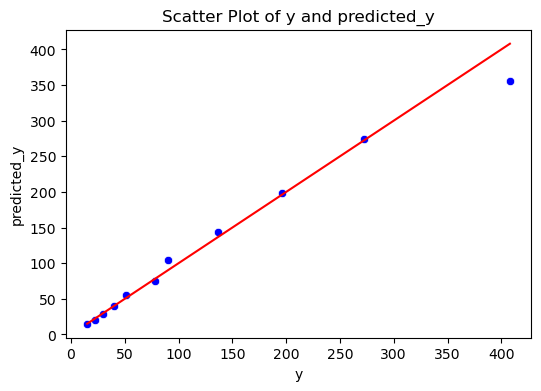

In [43]:
### Scatter plot of y vs predicted y and 45 degree line 

plt.figure(figsize=(6,4))

sns.scatterplot(data=df, x='y', y='predicted_y', color='blue')

plt.title('Scatter Plot of y and predicted_y')



# To Draw 45 degree line for comparison

## Max and min range of y value
max_limit = max(df['y'].max(), df['predicted_y'].max())  
min_limit = min(df['y'].min(), df['predicted_y'].min())  

# Create x values for the 45-degree line
x_values = np.linspace(min_limit, max_limit, 100)

# Plotting the 45-degree line
plt.plot(x_values, x_values, label='45 degree line', color='red')  


# Label x and y axis
plt.xlabel('y')
plt.ylabel('predicted_y')

plt.show()

In [44]:
# R square value
r_squared = regressor.score(x, ln_y) #fit on x, ln_y
r_squared

0.9951607081365164

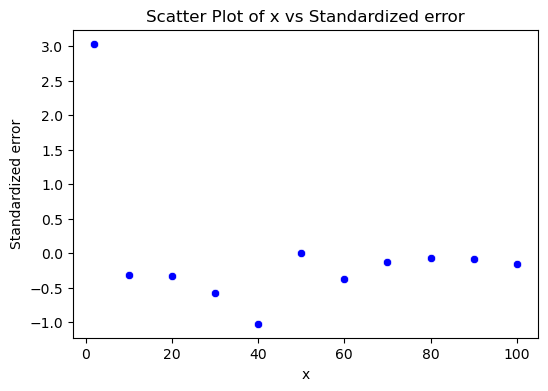

In [45]:
# Scalar plot of x vs standardized error

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='x', y='Standard error', color='blue')

plt.title('Scatter Plot of x vs Standardized error')

plt.xlabel('x')
plt.ylabel('Standardized error')

plt.show()

In [46]:
# Coefficients 
slope = regressor.coef_[0]  # Slope of the regression line
intercept = regressor.intercept_  # Intercept of the regression line

In [47]:
slope

array([-0.03230145])

In [48]:
intercept

array([5.93846171])

So estimate of $\beta_1 = -0.03230145$ 

and estimate of $\beta_0 = 5.93846171 $  

### Modeling the equation from linear regression 

Since the fit is on $ln(y)$ and $x$

Linear model (regression line) is $$ ln (y) = \beta_0 + \beta_1 x $$
so $$ y = e^{\beta_0 + \beta_1 x} $$
i.e, $$ y = e^{\beta_0}e^{\beta_1 x} $$

##### Calculating $e^{\beta_0}$ 

In [49]:
beta_0 = 5.93846171
e_beta_0 = np.exp(beta_0)
print('e^beta_0 = ', e_beta_0 )

e^beta_0 =  379.35092873184476


#### So equation for the model is 

$$ y = 379.35092e^{−0.03230145 x} $$

The high value of $R^2$ and plot of x Vs standardized error and plot of y vs predicted value of y support the choiceof this exponential model

### Plot between lnx and y is also linear so let us try to fit and evaluate the model

In [50]:
# data frame
df.head(3)

,x,y,ln_x,ln_y,ln predicted y,predicted_y,error,Standard error
0,2,408,0.693147,6.011267,5.873859,355.618601,52.381399,3.038123
1,10,272,2.302585,5.605802,5.615447,274.636172,-2.636172,-0.314698
2,20,196,2.995732,5.278115,5.292433,198.826525,-2.826525,-0.326299


In [51]:
# Drop columns
columns_to_drop = ['ln_y', 'ln predicted y', 'predicted_y', 'error', 'Standard error']

df.drop(columns=columns_to_drop, inplace=True)

df.head(3)

,x,y,ln_x
0,2,408,0.693147
1,10,272,2.302585
2,20,196,2.995732


In [52]:
ln_x = df['ln_x'].values
y = df['y'].values

ln_x = ln_x.reshape(-1,1)
y = y.reshape(-1,1)

In [53]:
regressor.fit(ln_x,y)

LinearRegression()

In [54]:
predicted_y = regressor.predict(ln_x)
df['predicted_y'] = predicted_y

df['error'] = df['y'] - df['predicted_y']

# Standardized error
df['Standard error'] = scaler.fit_transform(df[['error']])  # Already imported StandardScaler as scalar

In [55]:
df.head(4)

,x,y,ln_x,predicted_y,error,Standard error
0,2,408,0.693147,421.879811,-13.879811,-1.241793
1,10,272,2.302585,251.557650,20.442350,1.828927
2,20,196,2.995732,178.203888,17.796112,1.592175
3,30,137,3.401197,135.294688,1.705312,0.152570


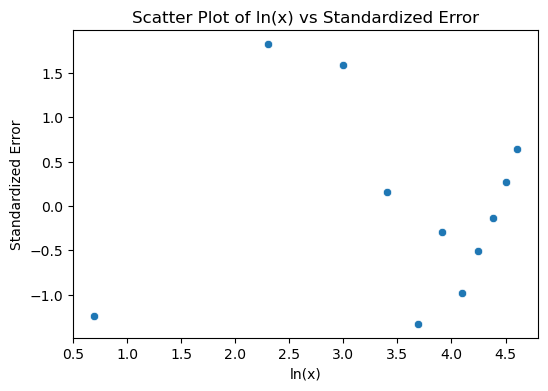

In [56]:
# Scatter plot ln(x) vs Standardized error
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='ln_x', y='Standard error')

plt.title('Scatter Plot of ln(x) vs Standardized Error')
plt.xlabel('ln(x)')
plt.ylabel('Standardized Error')

plt.show()

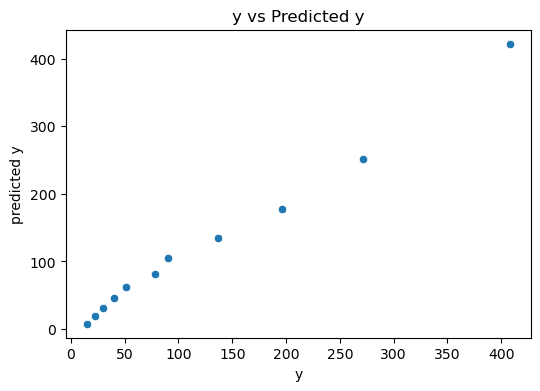

In [57]:
# Scatter plot y vs predicted y
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='y', y='predicted_y')

plt.title('y vs Predicted y')
plt.xlabel('y')
plt.ylabel('predicted y')

plt.show()

In [58]:
# R^2 value

r_squared = regressor.score(ln_x, y) #fit on ln_x and y
r_squared

0.9911129835844742

<font color = green> Both the graphs and high $R^2$ value shows that the model is a good fit

#### Model the equation

In [59]:
# Coefficients of the regression
slope = regressor.coef_[0]  # Slope of the regression line
intercept = regressor.intercept_  # Intercept of the regression line

print('slope',slope)
print('Intercept',intercept)

slope [-105.82710857]
Intercept [495.23357249]


So $\beta_0 = 495.23357249$ and $\beta_1 = -105.82710857$

Since fit is on $y$ and $ln(x)$ equation is $$ y = \beta_0 + \beta_1 ln(x) $$ 

So model equation is $y = 495.23357249 −105.82710857 ln(x) $